In [68]:
from __future__ import divison
import torch as t
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() #可以把Tensor转成Image， 方便可视化


SyntaxError: future feature divison is not defined (<ipython-input-68-972755744b8a>, line 1)

In [2]:
class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # reshape
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = Net()

print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
params = list(net.parameters())
print(len(params))

for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

10
('conv1.weight', ':', torch.Size([6, 1, 5, 5]))
('conv1.bias', ':', torch.Size([6]))
('conv2.weight', ':', torch.Size([16, 6, 5, 5]))
('conv2.bias', ':', torch.Size([16]))
('fc1.weight', ':', torch.Size([120, 400]))
('fc1.bias', ':', torch.Size([120]))
('fc2.weight', ':', torch.Size([84, 120]))
('fc2.bias', ':', torch.Size([84]))
('fc3.weight', ':', torch.Size([10, 84]))
('fc3.bias', ':', torch.Size([10]))


In [22]:
input = Variable(t.randn(1, 1, 32, 32))
out = net(input)
print(out.size())

target = Variable(t.arange(0, 10).float())
criterion = nn.MSELoss()
loss = criterion(out, target)

#print(loss)

#net.zero_grad()

#print(net.conv1.bias.grad)
#loss.backward()
#print(net.conv1.bias.grad)

#learning_rate = 0.01
#for f in net.parameters():
#    f.data.sub_(f.grad.data * learning_rate) #inplace 减法

optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中
# 先梯度清零 (与net.zero_grad()效果一样)
optimizer.zero_grad()

# 计算损失
output = net(input)
loss = criterion(output, target)

# 反向传播
loss.backward()

# 更新参数
optimizer.step()

torch.Size([1, 10])


0it [00:00, ?it/s]

100%|█████████▉| 170434560/170498071 [02:54<00:00, 990432.00it/s] 

Files already downloaded and verified
ship


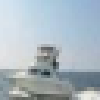

170500096it [03:10, 990432.00it/s]                               

In [48]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 训练集


                               
trainset = tv.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    
trainloader = t.utils.data.DataLoader( trainset, batch_size=4, shuffle=True, num_workers=2)
                               
# 测试集
                               
testset = tv.datasets.CIFAR10('./data/', train=False, download=True, transform=transform)
                               
testloader = t.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
                               
(data, label) = trainset[100]
print(classes[label])
                               
#
show((data + 1) / 2).resize((100, 100))

       deer        deer        deer       plane


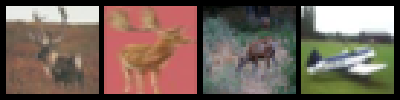

In [81]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(' '.join('%11s' %classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400, 100))

In [53]:
class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # reshape
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = Net()

print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [73]:
criterion = nn.CrossEntropyLoss() #定义交叉熵函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate((trainloader), 0):
        inputs, labels = data
        #inputs, labels = Variable(inputs), Variable(labels)
        
        #梯度清零
        optimizer.zero_grad()
        
        #forward + backward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
        

[1,  2000] loss: 0.709
[1,  4000] loss: 0.754
[1,  6000] loss: 0.771
[1,  8000] loss: 0.804
[1, 10000] loss: 0.806
[1, 12000] loss: 0.819
[2,  2000] loss: 0.696
[2,  4000] loss: 0.720
[2,  6000] loss: 0.771
[2,  8000] loss: 0.774
[2, 10000] loss: 0.773
[2, 12000] loss: 0.787


        cat        ship        ship       plane
        dog        ship         car       plane


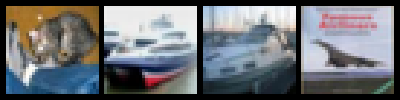

In [82]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print(' '.join('%11s' %classes[labels[j]] for j in range(4)))


outputs = net(Variable(images))
_, predicted = t.max(outputs.data, 1)

print(' '.join('%11s' %classes[predicted[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400, 100))





In [79]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('10000张测试集中的正确率为: %f %%' %(100 * correct / total))

10000张测试集中的正确率为: 62.000000 %
